In [94]:
import numpy as np, pandas as pd
import fiona
import geopandas as gpd

import workflow.ui
workflow.ui.setup_logging(1,None) # default is printing logging.INFO

from ANN_Module import PTF_MODEL
from DB_Module import DB
import time as T

import logging
import matplotlib.pyplot as plt

In [91]:
fname_soil_data = '../workflow_tpls/rosetta_v3.0beta/output/test_input_H3w.txt'
fname_sqlite = '../workflow_tpls/rosetta_v3.0beta/sqlite/Rosetta.sqlite'
fname_vgm_output = '../workflow_tpls/rosetta_v3.0beta/output/vgm_out.txt'

fname_soil_gdb = "/Users/shua784/Dropbox/PNNL/Projects/Columbia_Basin/Reach_domain_QGIS/US_soil/gNATSGO_WA.gdb"
fname_mukey_agg = "./results/mukey_soil_property.csv"
fname_soil_parameters = "./results/mukey_soil_parameters.csv"

# read in soil data

List all tables within geodatabase

In [7]:
fiona.listlayers(fname_soil_gdb)

['chaashto',
 'chconsistence',
 'chdesgnsuffix',
 'chfrags',
 'chorizon',
 'chpores',
 'chstruct',
 'chstructgrp',
 'chtext',
 'chtexture',
 'chtexturegrp',
 'chtexturemod',
 'chunified',
 'cocanopycover',
 'cocropyld',
 'codiagfeatures',
 'coecoclass',
 'coeplants',
 'coerosionacc',
 'coforprod',
 'coforprodo',
 'cogeomordesc',
 'cohydriccriteria',
 'cointerp',
 'comonth',
 'component',
 'copm',
 'copmgrp',
 'copwindbreak',
 'corestrictions',
 'cosoilmoist',
 'cosoiltemp',
 'cosurffrags',
 'cosurfmorphgc',
 'cosurfmorphhpp',
 'cosurfmorphmr',
 'cosurfmorphss',
 'cotaxfmmin',
 'cotaxmoistcl',
 'cotext',
 'cotreestomng',
 'cotxfmother',
 'distinterpmd',
 'distlegendmd',
 'distmd',
 'featdesc',
 'laoverlap',
 'legend',
 'legendtext',
 'mapunit',
 'month',
 'muaggatt',
 'muaoverlap',
 'mucropyld',
 'mutext',
 'sacatalog',
 'sainterp',
 'sdvalgorithm',
 'sdvattribute',
 'sdvfolder',
 'sdvfolderattribute',
 'mdstatdomdet',
 'mdstatdommas',
 'mdstatidxdet',
 'mdstatidxmas',
 'mdstatrshipdet'

In [36]:
df_chorizon = gpd.read_file(fname_soil_gdb, driver='FileGDB', layer='chorizon')

In [15]:
list(df_chorizon.columns)

['hzname',
 'desgndisc',
 'desgnmaster',
 'desgnmasterprime',
 'desgnvert',
 'hzdept_l',
 'hzdept_r',
 'hzdept_h',
 'hzdepb_l',
 'hzdepb_r',
 'hzdepb_h',
 'hzthk_l',
 'hzthk_r',
 'hzthk_h',
 'fraggt10_l',
 'fraggt10_r',
 'fraggt10_h',
 'frag3to10_l',
 'frag3to10_r',
 'frag3to10_h',
 'sieveno4_l',
 'sieveno4_r',
 'sieveno4_h',
 'sieveno10_l',
 'sieveno10_r',
 'sieveno10_h',
 'sieveno40_l',
 'sieveno40_r',
 'sieveno40_h',
 'sieveno200_l',
 'sieveno200_r',
 'sieveno200_h',
 'sandtotal_l',
 'sandtotal_r',
 'sandtotal_h',
 'sandvc_l',
 'sandvc_r',
 'sandvc_h',
 'sandco_l',
 'sandco_r',
 'sandco_h',
 'sandmed_l',
 'sandmed_r',
 'sandmed_h',
 'sandfine_l',
 'sandfine_r',
 'sandfine_h',
 'sandvf_l',
 'sandvf_r',
 'sandvf_h',
 'silttotal_l',
 'silttotal_r',
 'silttotal_h',
 'siltco_l',
 'siltco_r',
 'siltco_h',
 'siltfine_l',
 'siltfine_r',
 'siltfine_h',
 'claytotal_l',
 'claytotal_r',
 'claytotal_h',
 'claysizedcarb_l',
 'claysizedcarb_r',
 'claysizedcarb_h',
 'om_l',
 'om_r',
 'om_h',
 'dbte

In [13]:
df_component = gpd.read_file(fname_soil_gdb, driver='FileGDB', layer='component')

In [16]:
list(df_component.columns)

['comppct_l',
 'comppct_r',
 'comppct_h',
 'compname',
 'compkind',
 'majcompflag',
 'otherph',
 'localphase',
 'slope_l',
 'slope_r',
 'slope_h',
 'slopelenusle_l',
 'slopelenusle_r',
 'slopelenusle_h',
 'runoff',
 'tfact',
 'wei',
 'weg',
 'erocl',
 'earthcovkind1',
 'earthcovkind2',
 'hydricon',
 'hydricrating',
 'drainagecl',
 'elev_l',
 'elev_r',
 'elev_h',
 'aspectccwise',
 'aspectrep',
 'aspectcwise',
 'geomdesc',
 'albedodry_l',
 'albedodry_r',
 'albedodry_h',
 'airtempa_l',
 'airtempa_r',
 'airtempa_h',
 'map_l',
 'map_r',
 'map_h',
 'reannualprecip_l',
 'reannualprecip_r',
 'reannualprecip_h',
 'ffd_l',
 'ffd_r',
 'ffd_h',
 'nirrcapcl',
 'nirrcapscl',
 'nirrcapunit',
 'irrcapcl',
 'irrcapscl',
 'irrcapunit',
 'cropprodindex',
 'constreeshrubgrp',
 'wndbrksuitgrp',
 'rsprod_l',
 'rsprod_r',
 'rsprod_h',
 'foragesuitgrpid',
 'wlgrain',
 'wlgrass',
 'wlherbaceous',
 'wlshrub',
 'wlconiferous',
 'wlhardwood',
 'wlwetplant',
 'wlshallowwat',
 'wlrangeland',
 'wlopenland',
 'wlwood

# aggregate soil property

Processing steps taken from [USGS area- and depth- weighted SSURGO variables](https://water.usgs.gov/GIS/metadata/usgswrd/XML/ds866_ssurgo_variables.xml#Metadata_Reference_Information)

>In order to process soil attributes by soil mapping unit (MUKEY) from the SSURGO database, at least three tables **(mapunit, component, and CHORIZON)** are needed along with the spatial coverages.  These files can be accessed from [NRCS](http://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/geo/?cid=nrcs142p2_053628).  All available data were downloaded, processed as outlined below. 
    SSURGO map unit data are stored in the map unit table (MAPUNIT.TXT), and are referenced by the field MUKEY.  Map units consist of multiple, unmapped soil types called "components."   Component data are stored in the component table (COMP.TXT), and are referenced by the field COKEY.  Soil components (or soil type) are associated with multiple horizons.  Horizon data are stored in the CHORIZON table (CHORIZON.TXT), and are referenced by the field COKEY.  Since there is a one to many (**mapunit:component:horizon**) relationship between spatial and horizon-level soil property data, two aggregation steps are required in order to produce a thematic map.
    Deriving MUKEY average values for permeability, available water capacity, bulk density, saturated hydraulic conductivity, soil erodibility, field capacity, porosity, average soil thickness, and organic matter required that a weighted-average value be computed for all the soil horizons in a soil component, and then a weighted-average value was computed for all the soil components in a soil mapping unit. **First, the component average values were computed by weighting the layer values by their thickness. Second, the MUKEY average was computed by weighting the component average values by their percentage composition of the MUKEY.**
    Each step of the two-step weighting process was done exactly as described above: first, the layer values were weighted by their thicknesses and then the component values were weighted by their percentage composition.  The methods used to derive soil variables were taken from the NRCS's SSURGO Data Packaging and Use ([NRCS, 2011 SSURGO meta data and documentation](http://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/ref/?cid=nrcs142p2_053631).  ESRI's ArcInfo Workstation version 9.2 and GNU's awk program version 1.2.0 were used to process all SSURGO files.
    A weighted average of the soil property value for all components in the map unit is used to attribute the map unit for that soil property. Percent composition is used as the weighting factor. This aggregation method is only suitable for numerical attributes.  If the soil property being aggregated is an attribute of a soil horizon, then a single value for all included horizons must be determined for each component before computing a weighted average for all components. In this case, the single  component value is also computed as a weighted average, where the weighting factor for each horizon is its percentage of the depth range in question.  In the following example, a weighted-average value for total clay is calculated.

In [112]:
df_component.rename(columns={'comppct_r':'component pct [%]'}, inplace = True)

## preprocess tables

In [21]:
horizon_rename_list = {'hzdept_r':'top depth [cm]', 'hzdepb_r':'bot depth [cm]', 'ksat_r':'sat K [um/s]', 
                  'sandtotal_r':'total sand pct [%]', 'silttotal_r':'total silt pct [%]', 'claytotal_r':'total clay pct [%]',
                 'dbthirdbar_r':'bulk density [g/cm^3]', 'partdensity':'particle density [g/cm^3]'}

df_chorizon.rename(columns = horizon_rename_list, inplace = True)

### calculate layer thickness

In [47]:
df_chorizon['thickness [cm]'] = df_chorizon['bot depth [cm]'] - df_chorizon['top depth [cm]']

### calculate porosity

Fill in missing particle density with 2.65 g/cm3. This may not be realistic in some area.

In [40]:
df_chorizon.loc[pd.isnull(df_chorizon['particle density [g/cm^3]']), 'particle density [g/cm^3]'] = 2.65

df_chorizon['porosity [-]'] = 1 - df_chorizon['bulk density [g/cm^3]']/df_chorizon['particle density [g/cm^3]']

## get averaged map unit value

In [263]:
horizon_selected_cols = ['cokey', 'chkey', 'thickness [cm]', 'top depth [cm]', 'bot depth [cm]', 'sat K [um/s]', 'total sand pct [%]', 'total silt pct [%]', 'total clay pct [%]',
           'bulk density [g/cm^3]', 'particle density [g/cm^3]', 'porosity [-]']

mukey_agg_var = ['mukey', 'agg_Ksat [um/s]', 'agg_sand_pct [%]', 
           'agg_silt_pct [%]', 'agg_clay_pct [%]', 'agg_bulk_density [g/cm^3]', 'agg_porosity [-]', 'agg_soil_depth [cm]'
          ]

# comp_list = ['sat K [um/s]', 'total sand pct [%]', 'total silt pct [%]', 'total clay pct [%]', 'bulk density [g/cm^3]', 'porosity [-]','soil depth [cm]', 'cokey']

depth_ave_var = ['sat K [um/s]', 'total sand pct [%]', 'total silt pct [%]', 'total clay pct [%]', 'bulk density [g/cm^3]', 'porosity [-]']

area_ave_var = depth_ave_var + ['soil depth [cm]']

comp_list = area_ave_var + ['cokey']

In [163]:
unique_cokeys_in_chorizon = df_chorizon['cokey'].unique()

In [271]:
mukey_agg_df = pd.DataFrame(columns = mukey_agg_var)

for imukey in df_component['mukey'].unique()[:]:

    imukey_df = df_component.loc[df_component['mukey'] == imukey, ['mukey', 'cokey', 'component pct [%]']]
    
    comp_agg_df = pd.DataFrame(columns = comp_list)
    for icokey in imukey_df['cokey'].values[:]:
        
        if icokey in unique_cokeys_in_chorizon:

            idf_horizon = df_chorizon.loc[df_chorizon['cokey'] == icokey, horizon_selected_cols]

            depth_agg_value = []
            
            # depth-average based on layer thickness
            for ivar in depth_ave_var:
                idf = idf_horizon[['thickness [cm]', ivar]].dropna()
                if idf.empty:
                    ivalue = np.nan
                else:
                    ivalue = sum(idf['thickness [cm]']/idf['thickness [cm]'].sum()*idf[ivar])
                depth_agg_value.append(ivalue)

            idepth = idf_horizon['bot depth [cm]'].dropna().max()

            depth_agg_value.append(idepth)
            depth_agg_value.append(icokey)

            idf_comp = pd.DataFrame(np.array(depth_agg_value).reshape(1, len(depth_agg_value)), columns=comp_list)
            
            
            idf_comp[area_ave_var] = idf_comp[area_ave_var].apply(pd.to_numeric, errors = 'coerce')
            
            # normalize sand/silt/clay pct to make the sum(%sand, %silt, %clay)=1
            sum_soil = idf_comp.loc[:, 'total sand pct [%]':'total clay pct [%]'].sum().sum()
            if sum_soil !=100:
                for isoil in ['total sand pct [%]', 'total silt pct [%]', 'total clay pct [%]']:
                    idf_comp[isoil] = idf_comp[isoil]/sum_soil*100
            
            comp_agg_df = comp_agg_df.append(idf_comp)
            
    imukey_cokey_df = pd.merge(imukey_df, comp_agg_df, how = 'outer', left_on = 'cokey', right_on = 'cokey')

    # area-average based on component pct
    area_agg_value = []
    area_agg_value.append(imukey)
    for ivar in area_ave_var[:]:
        idf = imukey_cokey_df[['component pct [%]', ivar]].dropna()
        if idf.empty:
            ivalue = np.nan
        else:
            ivalue = sum(idf['component pct [%]']/idf['component pct [%]'].sum()*idf[ivar])
        area_agg_value.append(ivalue)

    idf_mukey_agg = pd.DataFrame(np.array(area_agg_value).reshape(1, len(area_agg_value)), columns=mukey_agg_var)
            
    mukey_agg_df = mukey_agg_df.append(idf_mukey_agg)

mukey_agg_df[mukey_agg_var[1:]] = mukey_agg_df[mukey_agg_var[1:]].apply(pd.to_numeric, errors = 'coerce')

In [272]:
mukey_agg_df

,mukey,agg_Ksat [um/s],agg_sand_pct [%],agg_silt_pct [%],agg_clay_pct [%],agg_bulk_density [g/cm^3],agg_porosity [-],agg_soil_depth [cm]
0,74975,23.000000,46.000000,44.000000,10.000000,1.055526,0.601688,152.00
0,74976,25.125000,53.318421,36.681579,10.000000,1.400658,0.471450,152.00
0,74977,217.684211,87.677632,8.309211,4.013158,1.478947,0.441907,152.00
0,74978,217.684211,87.677632,8.309211,4.013158,1.478947,0.441907,152.00
0,74979,86.526316,89.926316,7.445395,2.628289,1.308618,0.506182,152.00
...,...,...,...,...,...,...,...,...
0,676031,30.748019,55.359001,31.780353,12.860646,1.244287,0.530458,132.65
0,676034,8.225402,39.217148,38.957056,21.825796,1.345766,0.492164,68.18
0,676052,105.572383,54.803447,32.868151,12.328401,1.391594,0.474870,140.96
0,676071,21.381011,76.217172,16.282828,7.500000,1.071582,0.595629,138.74


In [273]:
mukey_agg_df.describe()

,agg_Ksat [um/s],agg_sand_pct [%],agg_silt_pct [%],agg_clay_pct [%],agg_bulk_density [g/cm^3],agg_porosity [-],agg_soil_depth [cm]
count,10803.000000,10775.000000,10775.000000,10775.000000,10800.000000,10800.000000,10926.000000
mean,38.003839,47.652252,38.502113,13.860340,1.270232,0.520429,138.478500
std,58.435521,22.229731,16.664495,9.328466,0.219458,0.082898,27.732305
min,0.000000,4.178951,0.600000,0.310950,0.174211,0.177358,15.000000
25%,9.000000,29.843421,26.087805,7.075336,1.191798,0.469835,135.333333
50%,13.742105,46.700658,37.140235,10.401316,1.324538,0.499884,152.000000
75%,37.262874,66.128991,49.698473,20.203316,1.404278,0.549817,152.000000
max,488.000000,97.900000,76.659613,65.230262,2.180000,0.934260,367.700000


In [275]:
mukey_agg_df.to_csv(fname_mukey_agg, index= False)

## look up soil property using MUKEY

In [11]:
df = pd.read_csv(fname_mukey_agg)

df.set_index('mukey', inplace = True)

mukey = 74975

df.loc[mukey, :]

agg_Ksat [um/s]               23.000000
agg_sand_pct [%]              46.000000
agg_silt_pct [%]              44.000000
agg_clay_pct [%]              10.000000
agg_bulk_density [g/cm^3]      1.055526
agg_porosity [-]               0.601688
agg_soil_depth [cm]          152.000000
Name: 74975, dtype: float64

# get van Genutchen parameters from Rosettav3

The following codes are modified from [Zhang and Schaap, 2017 WRR](https://doi.org/10.1016/j.jhydrol.2017.01.004) to fit in current workflow. The source code and documentation are located [here](http://www.u.arizona.edu/~ygzhang/rosettav3/). For old vs new Rosetta model comparision, also refer to this [presentation](https://soil-modeling.org/news/news-images/zhang-2017-ismc-agu.pdf).

MODELS (note model 1 and 101 are still missing: textural tables of parameters):

|model|description|data inputs|
|---|---|---|
|2|New Rosettav3|sand, silt, clay|
|3|New Rosettav3|sand, silt, clay, bulk density|
|4|New Rosettav3|sand, silt, clay, bulk density, theta at 33 kPa|
|5|New Rosettav3|sand, silt, clay, bulk density, theta at 33 kPa and 1500 kPa|
|102|Old Rosettav1|sand, silt, clay|
|103|Old Rosettav1|sand, silt, clay, bulk density|
|104|Old Rosettav1|sand, silt, clay, bulk density, theta at 33 kPa|
|105|Old Rosettav1|sand, silt, clay, bulk density, theta at 33 kPa and 1500 kPa|

Notes:
- old Rosettav1 does not output Ks
- input data must has dim(nvar, nsample) not the other way

## get input from numpy array

Need to transpose the data so that the array have the shape (nvar, nsample), where nvar is number of variables, nsample is number of samples. This is due to a Matlab convention

In [35]:
def get_vgm_from_Rosetta(data, model_type):
    with DB(host='localhost', user='root', db_name='Rosetta', sqlite_path=fname_sqlite) as db:
        
        #convert data from 1d array to nd matrix if necessary
        if data.ndim ==1:
            data = data.reshape(data.shape[0],1)
        # choose the right model corresponding to data inputs
#         model_type = 3
        ptf_model=PTF_MODEL(model_type, db) 
        logging.info(f"--Processing--\n get van Genutchen parameters from Rosetta (model {model_type})")
        T0=T.time()
        # with sum_data=False you get the raw output WITHOUT Summary statistics
        try:
            res_dict = ptf_model.predict(data, sum_data=True) 
        except:
            logging.info(f"data may be 1-D, try reshaping to (nvar,1)")
            

        logging.info(f"--Processing done-- \n time spent:{T.time()-T0}s")
        vgm_name=res_dict['var_names']

        # res_dict['sum_res_mean'] output log10 of VG-alpha,VG-n, and Ks
        vgm_mean=res_dict['sum_res_mean']
        vgm_new=np.stack((vgm_mean[0],vgm_mean[1],10**vgm_mean[2],10**vgm_mean[3],10**vgm_mean[4]))
        # transpose to match the data input format
        vgm_new=vgm_new.transpose()
    #     logging.info(f'output van Genutchen parameters:')
    #     logging.info(f'\n|theta_r [cm^3/cm^3]|theta_s [cm^3/cm^3]|alpha [1/cm]| n [-] |Ks [cm/day]|\n{vgm_new}')
    return vgm_new

In [46]:
cols = ['agg_sand_pct [%]', 'agg_silt_pct [%]', 'agg_clay_pct [%]', 'agg_bulk_density [g/cm^3]']

vgm_header = ['theta_r [cm^3/cm^3]', 'theta_s [cm^3/cm^3]', 'alpha [1/cm]', 'n [-]', 'Rosetta_Ks [cm/day]']

In [77]:
df = pd.read_csv(fname_mukey_agg)

sub_df = df.dropna(subset = cols).copy()

data = sub_df[cols].values.T

In [78]:
vgm = get_vgm_from_Rosetta(data, model_type = 3)

2020-10-22 10:26:05,560 - root - INFO: --Processing--
 get van Genutchen parameters from Rosetta (model 3)
2020-10-22 10:26:12,101 - root - INFO: --Processing done-- 
 time spent:6.540475845336914s


In [88]:
vgm_df = pd.DataFrame(vgm, columns=vgm_header)

vgm_df['mukey'] = sub_df['mukey'].values

soil_vgm = pd.merge(df, vgm_df, how = 'outer', left_on = 'mukey', right_on = 'mukey')

In [93]:
soil_vgm.describe()

,mukey,agg_Ksat [um/s],agg_sand_pct [%],agg_silt_pct [%],agg_clay_pct [%],agg_bulk_density [g/cm^3],agg_porosity [-],agg_soil_depth [cm],theta_r [cm^3/cm^3],theta_s [cm^3/cm^3],alpha [1/cm],n [-],Rosetta_Ks [cm/day]
count,1.105200e+04,10803.000000,10775.000000,10775.000000,10775.000000,10800.000000,10800.000000,10926.000000,10775.000000,10775.000000,10775.000000,10775.000000,10775.000000
mean,6.249032e+05,38.003839,47.652252,38.502113,13.860340,1.270232,0.520429,138.478500,0.076641,0.432358,0.010094,1.540344,105.719655
std,9.670093e+05,58.435521,22.229731,16.664495,9.328466,0.219458,0.082898,27.732305,0.018214,0.057227,0.006471,0.216495,140.450141
min,6.731000e+04,0.000000,4.178951,0.600000,0.310950,0.174211,0.177358,15.000000,0.044299,0.305283,0.002476,1.257640,3.355240
25%,7.142675e+04,9.000000,29.843421,26.087805,7.075336,1.191798,0.469835,135.333333,0.062847,0.393872,0.005229,1.450688,25.045671
50%,7.586550e+04,13.742105,46.700658,37.140235,10.401316,1.324538,0.499884,152.000000,0.071716,0.420020,0.007681,1.501255,54.034060
75%,7.002672e+05,37.262874,66.128991,49.698473,20.203316,1.404278,0.549817,152.000000,0.089528,0.455712,0.013704,1.544304,127.898503
max,3.168838e+06,488.000000,97.900000,76.659613,65.230262,2.180000,0.934260,367.700000,0.172738,0.770914,0.036698,3.868628,1356.422222


In [105]:
soil_vgm['agg_Ksat [m/s]'] = soil_vgm['agg_Ksat [um/s]']*1e-6
soil_vgm['Rosetta_Ks [m/s]'] = soil_vgm['Rosetta_Ks [cm/day]']/100/86400

In [107]:
soil_vgm.to_csv(fname_soil_parameters, index= False)

**compare Ks**

Text(0, 0.5, 'Rosetta Ks [m/d]')

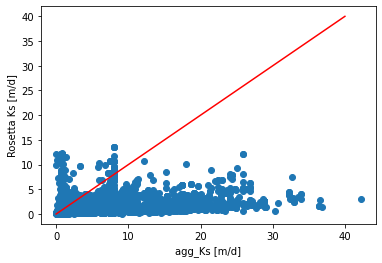

In [104]:
fig, ax = plt.subplots(1,1)
# convert to m/d
ax.plot(soil_vgm['agg_Ksat [um/s]']*0.0864, soil_vgm['Rosetta_Ks [cm/day]']/100, 'o')
ax.plot(np.linspace(0,40,100), np.linspace(0,40,100), 'r-')
ax.set_xlabel('agg_Ks [m/d]')
ax.set_ylabel('Rosetta Ks [m/d]')

**soil depth hist**

array([[<AxesSubplot:title={'center':'agg_soil_depth [cm]'}>]],
      dtype=object)

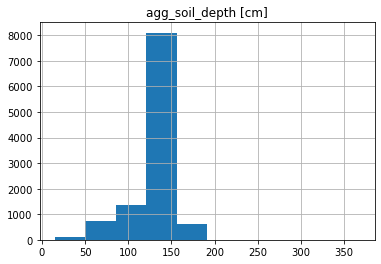

In [108]:
soil_vgm.hist(column='agg_soil_depth [cm]')

## get input from txt file

In [8]:
# Need to transpose the data so that the array have the shape (nvar, nsample), 
# where nvar is number of variables, nsample is number of samples. 
# This is due to a Matlab convention
data = np.genfromtxt(fname_soil_data, delimiter='',dtype=np.float).transpose()

In [23]:
print_stats = False
with DB(host='localhost', user='root', db_name='Rosetta', sqlite_path=fname_sqlite) as db:

    logging.info("Getting models from database")
    T0=T.time()

    logging.info("Getting models from database, done (%s s)" % (T.time()-T0))

    logging.info(f'import soil data \n |%sand|%silt|%clay|bulk density [g/cm^3]|:\n {data.T}')

    T0=T.time()
    logging.info("--Processing--\n get van Genutchen parameters from Rosetta")

    # with sum_data=False you get the raw output WITHOUT Summary statistics
    res_dict = ptf_model.predict(data,sum_data=True) 
    
    

    logging.info(f"--Processing done-- \n time spent:{T.time()-T0}s")
    vgm_name=res_dict['var_names']

    # res_dict['sum_res_mean'] output log10 of VG-alpha,VG-n, and Ks
    vgm_mean=res_dict['sum_res_mean']
    vgm_new=np.stack((vgm_mean[0],vgm_mean[1],10**vgm_mean[2],10**vgm_mean[3],10**vgm_mean[4]))
    # transpose to match the data input format
    vgm_new=vgm_new.transpose()
    logging.info(f'output van Genutchen parameters:')
    logging.info(f'\n|theta_r [cm^3/cm^3]|theta_s [cm^3/cm^3]|alpha [1/cm]| n [-] |Ks [cm/day]|\n{vgm_new}')
    
    if print_stats:
        logging.info(f'STDV:\n{res_dict["sum_res_std"]}')
        logging.info(f'SKEW:\n{res_dict["sum_res_skew"]}')
        logging.info(f'KURT:\n{res_dict["sum_res_kurt"]}')
        logging.info(f'COV:\n{res_dict["sum_res_cov"]}')
    
    np.savetxt(fname_vgm_output, vgm_new, delimiter=',',fmt='%f') 

2020-10-21 12:13:24,955 - root - INFO: Getting models from database
2020-10-21 12:13:24,955 - root - INFO: Getting models from database, done (1.1920928955078125e-06 s)
2020-10-21 12:13:24,956 - root - INFO: import soil data 
 |%sand|%silt|%clay|bulk density [g/cm^3]|:
 [[54.49 30.16 15.35  1.2 ]
 [45.55 26.42 28.03  1.1 ]
 [37.91 30.98 31.11  1.  ]
 [20.   30.   50.    1.3 ]
 [80.   10.   10.    1.28]]
2020-10-21 12:13:24,956 - root - INFO: --Processing--
 get van Genutchen parameters from Rosetta
2020-10-21 12:13:24,983 - root - INFO: --Processing done-- 
 time spent:0.02631688117980957s
2020-10-21 12:13:24,983 - root - INFO: output van Genutchen parameters:
2020-10-21 12:13:24,984 - root - INFO: 
|theta_r [cm^3/cm^3]|theta_s [cm^3/cm^3]|alpha [1/cm]| n [-] |Ks [cm/day]|
[[8.04259881e-02 4.46880027e-01 9.24956604e-03 1.44944665e+00
  6.16741725e+01]
 [1.04314325e-01 5.00473066e-01 8.53579414e-03 1.37913360e+00
  5.91273142e+01]
 [1.10398192e-01 5.32456278e-01 7.19165074e-03 1.3798466

# get depth to bedrock

Most of the SSURGO soil data has depth < 2m and does not reflect the true depth-to-bedrock.

Options:

1. SSURGO (cut at 2m?)
2. SoilGrid, 250m, global map
3. 

## get DTB from SSURGO

In [109]:
soil_para = pd.read_csv(fname_soil_parameters)

In [118]:
df_muaggatt = gpd.read_file(fname_soil_gdb, driver='FileGDB', layer='muaggatt')

df_muaggatt.rename(columns = {'brockdepmin':'bedrock_depth_min_SSURGO [cm]'}, inplace = True)

In [124]:
sub_df = df_muaggatt[['mukey', 'bedrock_depth_min_SSURGO [cm]']].copy()

sub_df['mukey'] = sub_df['mukey'].apply(int)

In [129]:
merged_df = pd.merge(soil_para, sub_df, how = 'outer', left_on = 'mukey', right_on = 'mukey')

merged_df.to_csv(fname_soil_parameters, index= False)

**DTB hist**

array([[<AxesSubplot:title={'center':'bedrock_depth_min_SSURGO [cm]'}>]],
      dtype=object)

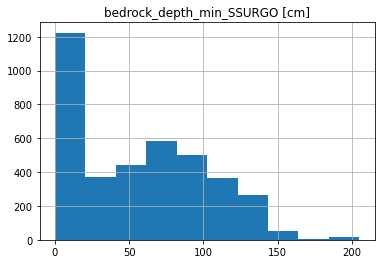

In [130]:
merged_df.hist(column='bedrock_depth_min_SSURGO [cm]')

## get DTB from SoilGrids